# Diffusion MRI: Basic Physics (Session 3)

By: Diego Hernando
Modified: Ruiqi Geng

Date: 12/7/2020

**Overview:** This notebook describes the physics of diffusion encoding in MR by simulating a set of spins in brownian motion, in the presence of a diffusion-weighting gradient. 

The additional materials describe more advanced phenomena such as anisotropic diffusion and diffusion-time dependent signals. 


In [406]:
from numpy import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
from IPython.display import clear_output
#%matplotlib inline 
font = {'weight' : 'normal',
        'size'   : 20}


In [407]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Define parameters for motion simulation (Brownian + (In)Coherent)

In [408]:
N = 200 # Number of protons (water molecules)
T = 80 # Diffusion time in ms
dt = 0.1 # Time step in ms
NT = int(T/dt)
D = 2E-3 # Diffusion coefficient in mm2/s

v=0.5 #uniform velocity
a=0 #0.5 #uniform acceleration

# Define a cell with impermeable walls
cell_radius_x = 200
cell_radius_y = 200
angles = np.linspace(0,2*np.pi,200)

### 1. Brownian motion, no bulk motion

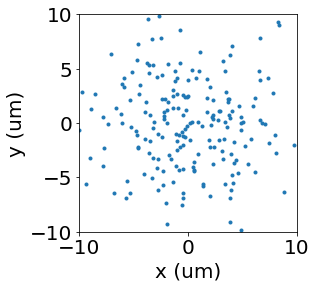

In [409]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx01 = np.zeros([N,NT])
posy01 = np.zeros([N,NT])
posx01[:,0] = pos0x
posy01[:,0] = pos0y
for kt in range(1,NT):
    # These next two lines introduce brownian motion (in 2D)
    posx01[:,kt] = posx01[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N)
    posy01[:,kt] = posy01[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N)  
    
    # Make sure that protons do not leave the cell
    undo = ((posx01[:,kt]/cell_radius_x)**2 + (posy01[:,kt]/cell_radius_y)**2) > 1   
    posx01[undo,kt] = posx01[undo,kt-1]
    posy01[undo,kt] = posy01[undo,kt-1]
    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx01[:,kt],posy01[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-10,10)
        axes.set_ylim(-10,10)
        plt.show()
        plt.pause(0.001)

### 2. Brownian motion + coherent motion

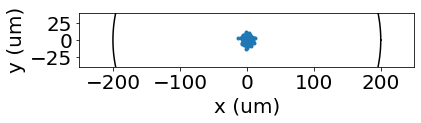

In [410]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx02 = np.zeros([N,NT])
posy02 = np.zeros([N,NT])
posx02[:,0] = pos0x
posy02[:,0] = pos0y

vx02 = np.zeros([N,NT])
vy02 = np.zeros([N,NT])
vx02[:,0] = v
vy02[:,0] = 0

ax02 = np.zeros([N,NT])
ay02 = np.zeros([N,NT])
ax02[:,0] = a
ay02[:,0] = 0

for kt in range(1,NT):
    vx05[:,kt] = vx05[:,kt-1] + ax05[1,0]*dt
    vy05[:,kt] = vy05[:,kt-1]
    # These next two lines introduce brownian + coherent motion (in 2D)
    posx02[:,kt] = posx02[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N) + vx02[:,kt]*dt
    posy02[:,kt] = posy02[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N) + vy02[:,kt]*dt 
    
    # Make sure that protons do not leave the cell
    undo = ((posx02[:,kt]/cell_radius_x)**2 + (posy02[:,kt]/cell_radius_y)**2) > 1   
    posx02[undo,kt] = posx02[undo,kt-1]
    posy02[undo,kt] = posy02[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx02[:,kt],posy02[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-250,250)
        axes.set_ylim(-40,40)
        plt.show()
        plt.pause(0.001)

### Brownian motion + coherent, time-variant motion

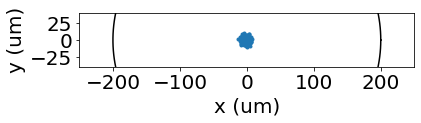

In [411]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx02 = np.zeros([N,NT])
posy02 = np.zeros([N,NT])
posx02[:,0] = pos0x
posy02[:,0] = pos0y

vx02 = np.zeros([N,NT])
vy02 = np.zeros([N,NT])
vx02[:,0] = v
vy02[:,0] = 0

ax02 = np.zeros([N,NT])
ay02 = np.zeros([N,NT])
ax02[:,0] = a
ay02[:,0] = 0

        
for kt in range(1,NT):
    vx02[:,kt] = (rnd.randint(-cell_radius_x/4,cell_radius_x/4))/10
    vy02[:,kt] = vy02[:,kt-1]
    # These next two lines introduce brownian + coherent motion (in 2D)
    posx02[:,kt] = posx02[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N) + vx02[:,kt]*dt
    posy02[:,kt] = posy02[:,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(N) + vy02[:,kt]*dt 
    
    # Make sure that protons do not leave the cell
    undo = ((posx02[:,kt]/cell_radius_x)**2 + (posy02[:,kt]/cell_radius_y)**2) > 1   
    posx02[undo,kt] = posx02[undo,kt-1]
    posy02[undo,kt] = posy02[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx02[:,kt],posy02[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-250,250)
        axes.set_ylim(-40,40)
        plt.show()
        plt.pause(0.001)

### 3. Brownian motion + Incoherent, time-invariant motion

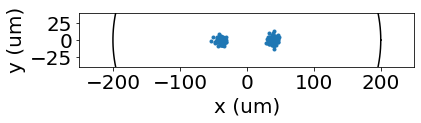

In [438]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx03 = np.zeros([N,NT])
posy03 = np.zeros([N,NT])
posx03[:,0] = pos0x
posy03[:,0] = pos0y

vx03 = np.zeros([N,NT])
vy03 = np.zeros([N,NT])
vx03[:,0] = 0
vy03[:,0] = 0

ax03 = np.zeros([N,NT])
ay03 = np.zeros([N,NT])
ax03[:,0] = 0
ay03[:,0] = 0

for kn in range(0,N):
    if kn<N/2:
        vx03[kn,:] = v
    else:
        vx03[kn,:] = -v
        
        
        #vx03[kn,:] = rnd.uniform(-cell_radius_x/200,cell_radius_x/200)
        vy03[kn,:] = 0
        
        ax03[kn,:] = 0 #rnd.uniform(-cell_radius_x/100,cell_radius_x/100)
        ay03[kn,:] = 0
        
for kt in range(1,NT):
    # These next two lines introduce brownian motion (in 2D)
    for kn in range(0,N):
        posx03[kn,kt] = posx03[kn,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(1) + vx03[kn,kt]*kt/10 + ax03[kn,kt]*kt*kt/200
        posy03[kn,kt] = posy03[kn,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(1) + vy03[kn,kt]*kt/10 + ay03[kn,kt]*kt*kt/200

    # Make sure that protons do not leave the cell
    undo = ((posx03[:,kt]/cell_radius_x)**2 + (posy03[:,kt]/cell_radius_y)**2) > 1   
    posx03[undo,kt] = posx03[undo,kt-1]
    posy03[undo,kt] = posy03[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
       clear_output(wait=True)
       points = plt.plot(posx03[:,kt],posy03[:,kt],'.')[0]   
       plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
       plt.xlabel('x (um)')
       plt.ylabel('y (um)')
       axes = plt.gca()
       axes.set_aspect('equal')
       axes.set_xlim(-250,250)
       axes.set_ylim(-40,40)
       plt.show()
       plt.pause(dt/100)

### 4. Brownian motion + Incoherent, time-variant motion

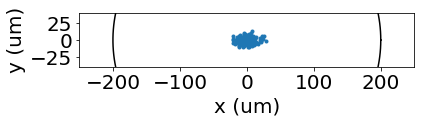

In [439]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx04 = np.zeros([N,NT])
posy04 = np.zeros([N,NT])
posx04[:,0] = pos0x
posy04[:,0] = pos0y

vx04 = np.zeros([N,NT])
vy04 = np.zeros([N,NT])
vx04[:,0] = 0
vy04[:,0] = 0

ax04 = np.zeros([N,NT])
ay04 = np.zeros([N,NT])
ax04[:,0] = 0
ay04[:,0] = 0

for kt in range(1,NT):
    # These next two lines introduce brownian motion (in 2D)
    
    for kn in range(0,N):
        vx04[kn,kt] = (rnd.uniform(-cell_radius_x/20,cell_radius_x/20))/10
        vy04[kn,kt] = 0
    
        posx04[kn,kt] = posx04[kn,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(1) + vx04[kn,kt]*kt/10
        posy04[kn,kt] = posy04[kn,kt-1] + np.sqrt(2*dt*D*1E3)*rnd.randn(1) + vy04[kn,kt]*kt/10

    # Make sure that protons do not leave the cell
    undo = ((posx04[:,kt]/cell_radius_x)**2 + (posy04[:,kt]/cell_radius_y)**2) > 1   
    posx04[undo,kt] = posx04[undo,kt-1]
    posy04[undo,kt] = posy04[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx04[:,kt],posy04[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-250,250)
        axes.set_ylim(-40,40)
        plt.show()
        plt.pause(dt/100)

### 5. Coherent motion

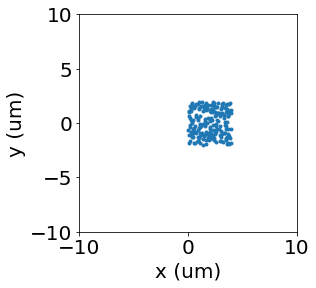

In [414]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx05 = np.zeros([N,NT])
posy05 = np.zeros([N,NT])
posx05[:,0] = pos0x
posy05[:,0] = pos0y

vx05 = np.zeros([N,NT])
vy05 = np.zeros([N,NT])
vx05[:,0] = v
vy05[:,0] = 0

ax05 = np.zeros([N,NT])
ay05 = np.zeros([N,NT])
ax05[:,0] = a
ay05[:,0] = 0

for kt in range(1,NT):
    vx05[:,kt] = vx05[:,kt-1] + ax05[1,0]*dt
    vy05[:,kt] = vy05[:,kt-1]
    # These next two lines introduce coherent motion (in 2D)
    posx05[:,kt] = posx05[:,kt-1] + vx05[:,kt]*dt
    posy05[:,kt] = posy05[:,kt-1] + vy05[:,kt]*dt  
    
    # Make sure that protons do not leave the cell
    undo = ((posx05[:,kt]/cell_radius_x)**2 + (posy05[:,kt]/cell_radius_y)**2) > 1   
    posx05[undo,kt] = posx05[undo,kt-1]
    posy05[undo,kt] = posy05[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx05[:,kt],posy05[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-10,10)
        axes.set_ylim(-10,10)
        plt.show()
        plt.pause(0.001)

### 6. Incoherent, time-invariant Motion

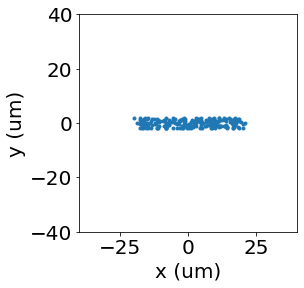

In [440]:
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx06 = np.zeros([N,NT])
posy06 = np.zeros([N,NT])
posx06[:,0] = pos0x
posy06[:,0] = pos0y

vx06 = np.zeros([N,NT])
vy06 = np.zeros([N,NT])

ax06 = np.zeros([N,NT])
ay06 = np.zeros([N,NT])

for kn in range(0,N):
        vx06[kn,:] = (rnd.randint(-cell_radius_x/4,cell_radius_x/4))/10
        vy06[kn,:] = 0
        
for kt in range(1,NT):
    # These next two lines introduce brownian motion (in 2D)
    for kn in range(0,N):
        posx06[kn,kt] = posx06[kn,kt-1] + vx06[kn,kt]*dt
        posy06[kn,kt] = posy06[kn,kt-1] + vy06[kn,kt]*dt

    # Make sure that protons do not leave the cell
    undo = ((posx06[:,kt]/cell_radius_x)**2 + (posy06[:,kt]/cell_radius_y)**2) > 1   
    posx06[undo,kt] = posx06[undo,kt-1]
    posy06[undo,kt] = posy06[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx06[:,kt],posy06[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-40,40)
        axes.set_ylim(-40,40)
        plt.show()
        plt.pause(dt/100)

### 7. Incoherent, time-variant Motion

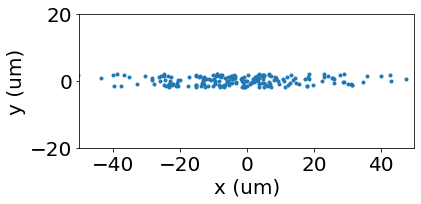

In [441]:
print(N)
# Initial location of protons
pos0x = 4*rnd.rand(N)-2
pos0y = 4*rnd.rand(N)-2

# Display the initial location of the protons and cell
fig, ax = plt.subplots()
plt.rc('font', **font)
plt.show()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
points = ax.plot(pos0x,pos0y,'.')[0]
ax.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')

# Start the simulation
posx07 = np.zeros([N,NT])
posy07 = np.zeros([N,NT])
posx07[:,0] = pos0x
posy07[:,0] = pos0y

vx07 = np.zeros([N,NT])
vy07 = np.zeros([N,NT])

ax07 = np.zeros([N,NT])
ay07 = np.zeros([N,NT])

for kt in range(1,NT):
    # These next two lines introduce brownian motion (in 2D)
    
    for kn in range(0,N):
        vx07[kn,kt] = (rnd.randint(-cell_radius_x/4,cell_radius_x/4))/10
        vy07[kn,kt] = 0
    
        posx07[kn,kt] = posx07[kn,kt-1] + vx[kn,kt]
        posy07[kn,kt] = posy07[kn,kt-1] + vy[kn,kt]

    # Make sure that protons do not leave the cell
    undo = ((posx07[:,kt]/cell_radius_x)**2 + (posy07[:,kt]/cell_radius_y)**2) > 1   
    posx07[undo,kt] = posx07[undo,kt-1]
    posy07[undo,kt] = posy07[undo,kt-1]

    
    # Display the first few steps of the simulation
    if kt<NT/20:
        clear_output(wait=True)
        points = plt.plot(posx07[:,kt],posy07[:,kt],'.')[0]   
        plt.plot(cell_radius_x*np.cos(angles), cell_radius_y*np.sin(angles),'k')
        plt.xlabel('x (um)')
        plt.ylabel('y (um)')
        axes = plt.gca()
        axes.set_aspect('equal')
        axes.set_xlim(-50,50)
        axes.set_ylim(-20,20)
        plt.show()
        plt.pause(dt/100)

### Create a diffusion-weighting gradient (we will assume Gx)

Note that for a given diffusion gradient $G_x$, the magnetic field as a function of $x$ is a ramp with slope $G_x$, ie: $B_0(x) = G_x \cdot x$. So, if we change the diffusion gradient over time as described by our waveform, we end up with a time-varying magnetic field ramp:

$$B_0(x;t) = G_x(t) \cdot x$$

We will also calculate the 'b-value' as a measure of how much diffusion weighting our gradient waveform generates

$$b = \gamma^2 \int_0^T \left( \int_0^t G(\tau) d \tau \right)^2 dt$$

where $\gamma$ is the gyromagnetic ratio ($\gamma/(2 \pi) = 42.58 \times 10^6$ MHz/T) and $T$ is the total duration of the diffusion gradient. 


## Monopolar Gradient Waveform

400.0000000000031
3.68594044175552e-14
18290.124658849323
18381.91936869673
1461380.960242059


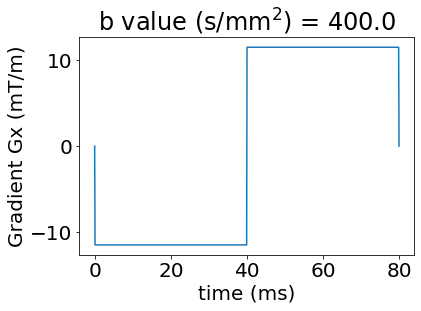

In [420]:
# Generate diffusion gradient
b = 400 # Target diffusion weighting b value, in s/mm^2
t = dt*np.linspace(0,NT,NT)
Gnorm = 0*t;
Gnorm[(t>0)*(t<T/2)] = -1 # In mT/m
Gnorm[(t>T/2)*(t<T)] = 1 # In mT/m

# Calculate b value
gammabar = 42.576E6
gamma = gammabar*2*np.pi
binit = (gamma**2) * np.sum((np.cumsum(Gnorm*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6

# Scale our gradient waveform to match the target b value
G = Gnorm*np.sqrt(b/binit)

# Plot waveform
plt.plot(t,G)    
plt.title('b value (s/mm$^2$) = ' '{:.1f}'.format(b));
plt.xlabel('time (ms)')
plt.ylabel('Gradient Gx (mT/m)')
plt.rc('font', **font)

# Calculate b value  again, just to make sure
bfinal = (gamma**2) * np.sum((np.cumsum(G*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6
print(bfinal)
m0=0
m1=0
m2=0
for kt in range(1,800):
    m0=m0+G[kt]*dt
    m1=m1+G[kt]*kt/10*dt
    m2=m2+G[kt]*kt*kt/100*dt
print(m0)    
print(m1)
print(max(G)*40*40)
print(m2)

## M1-nulled gradient waveform
Moments of the gradients are defined as:
$$M_0(t) = \int_0^t dt G_x(t) $$
$$M_1(t) = \int_0^t dt G_x(t) t $$
$$M_2(t) = \int_0^t dt G_x(t) t^2 $$

-4.578063827664549
-182.89364991520205
717877.0097981092


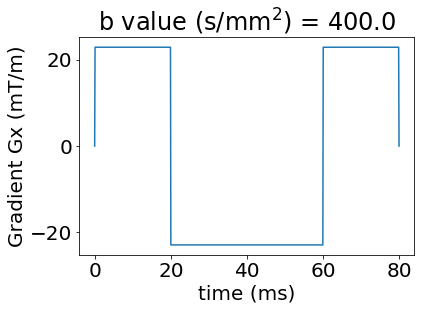

In [425]:
# Generate diffusion gradient
t = dt*np.linspace(0,NT,NT)
Gnorm1 = 0*t;
Gnorm1[(t>0)*(t<T/4)] = 1 # In mT/m
Gnorm1[(t>T/4)*(t<T/4*3)] = -1 # In mT/m
Gnorm1[(t>T/4*3)*(t<T)] = 1 # In mT/m

# Calculate b value
gammabar = 42.576E6
gamma = gammabar*2*np.pi
binit = (gamma**2) * np.sum((np.cumsum(Gnorm1*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6

# Scale our gradient waveform to match the target b value
G1 = Gnorm1*np.sqrt(b/binit)


# Calculate b value  again, just to make sure
bfinal = (gamma**2) * np.sum((np.cumsum(G1*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6

# Plot waveform
plt.plot(t,G1)    
plt.title('b value (s/mm$^2$) = ' '{:.1f}'.format(bfinal));
plt.xlabel('time (ms)')
plt.ylabel('Gradient Gx (mT/m)')
plt.rc('font', **font)

m0=0
m1=0
m2=0
for kt in range(1,800):
    m0=m0+G1[kt]*dt
    m1=m1+G1[kt]*kt/10*dt
    m2=m2+G1[kt]*kt*kt/100*dt
print(m0)    
print(m1)
print(m2)

## M2-nulled gradient waveform

400.0000000000036
-243.06173847086816
-9710.316451911196
-3251.1717172648914


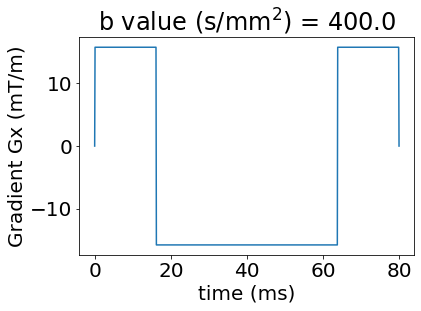

In [427]:
# Generate diffusion gradient
t = dt*np.linspace(0,NT,NT)
Gnorm2 = 0*t;
Gnorm2[(t>0)*(t<16.2)] = 1 # In mT/m
Gnorm2[(t>16.2)*(t<63.8)] = -1 # In mT/m
Gnorm2[(t>63.8)*(t<T)] = 1 # In mT/m

# Calculate b value
gammabar = 42.576E6
gamma = gammabar*2*np.pi
binit = (gamma**2) * np.sum((np.cumsum(Gnorm2*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6

# Scale our gradient waveform to match the target b value
G2 = Gnorm2*np.sqrt(b/binit)

# Plot waveform
plt.plot(t,G2)    
plt.title('b value (s/mm$^2$) = ' '{:.1f}'.format(b));
plt.xlabel('time (ms)')
plt.ylabel('Gradient Gx (mT/m)')
plt.rc('font', **font)

# Calculate b value  again, just to make sure
bfinal = (gamma**2) * np.sum((np.cumsum(G2*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6
print(bfinal)
m0=0
m1=0
m2=0
for kt in range(1,800):
    m0=m0+G2[kt]*dt
    m1=m1+G2[kt]*kt/10*dt
    m2=m2+G2[kt]*kt*kt/100*dt
print(m0)    
print(m1)
print(m2)

## Look at the phase evolution of each of our spins

We just need to keep in mind a couple things: 

We have a **time-dependent magnetic field ramp** introduced by our gradient waveform: $$B_0(x;t) = G_x(t) \cdot x$$

Our protons are moving around in space, in particularly they are moving around in the x direction (movement along y does not matter in this case since our gradient is along x)

The precession frequency of the spin from each proton depends on the magnetic field observed by this proton, as described by the **Larmor equation**: $\omega = \gamma B_0$, and since in our case the magnetic field is ramp-shaped and changing over time, the **precession frequency of each spin** is: 

$$\omega(x;t) = \gamma B_0(x;t) = \gamma G_x(t) \cdot x$$




## Monopolar gradient waveform

<ipython-input-443-aca77adccb5b>:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
<ipython-input-443-aca77adccb5b>:53: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
<ipython-input-443-aca77adccb5b>:76: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
<ipython-input-443-aca77adccb5b>:99: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.r

(-0.03611544697650654-0.03996420228894628j)

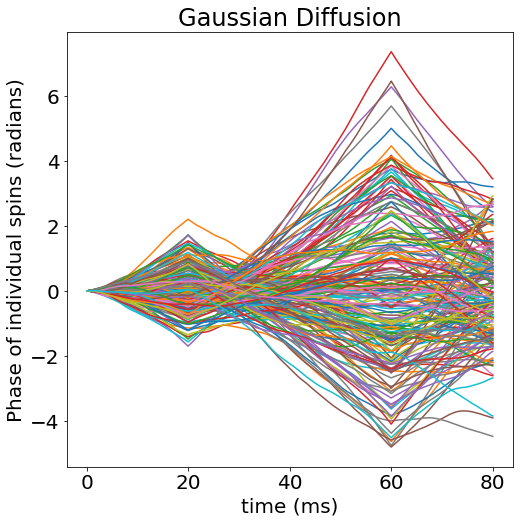

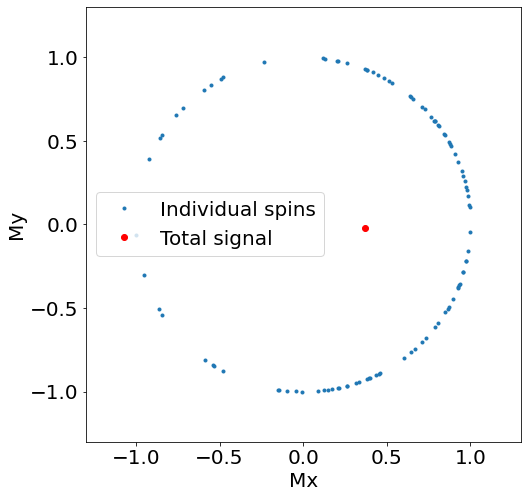

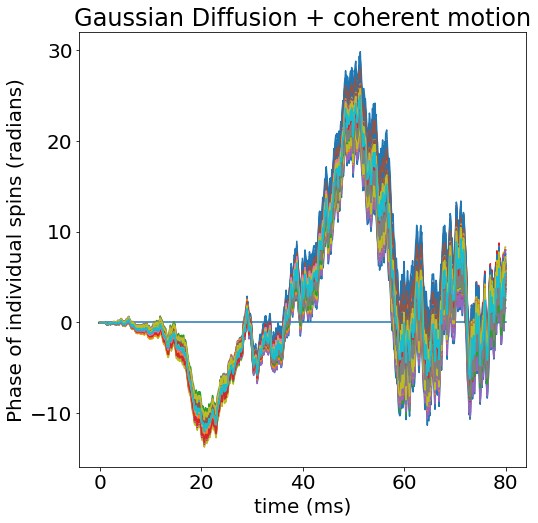

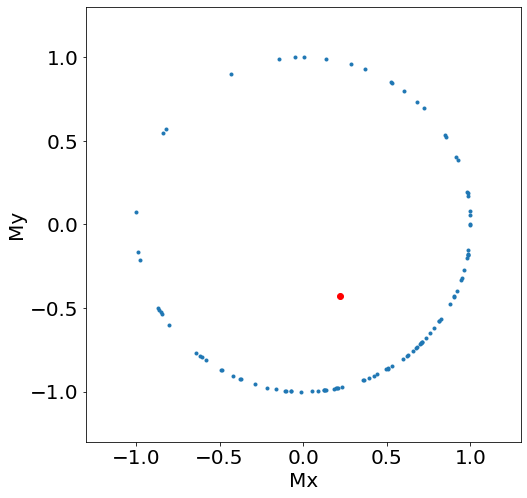

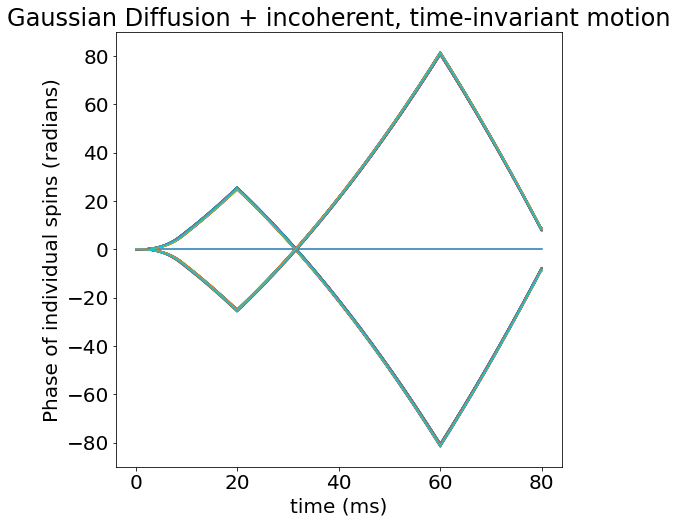

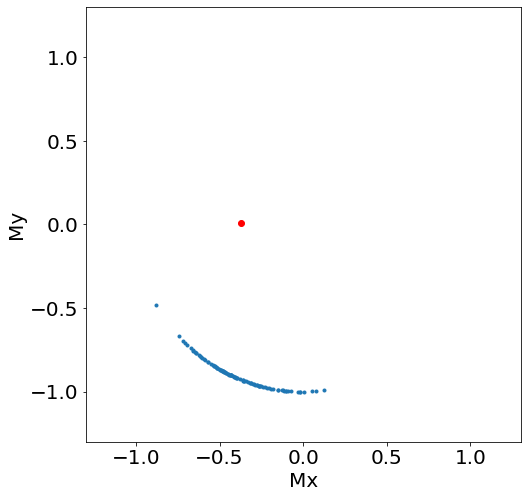

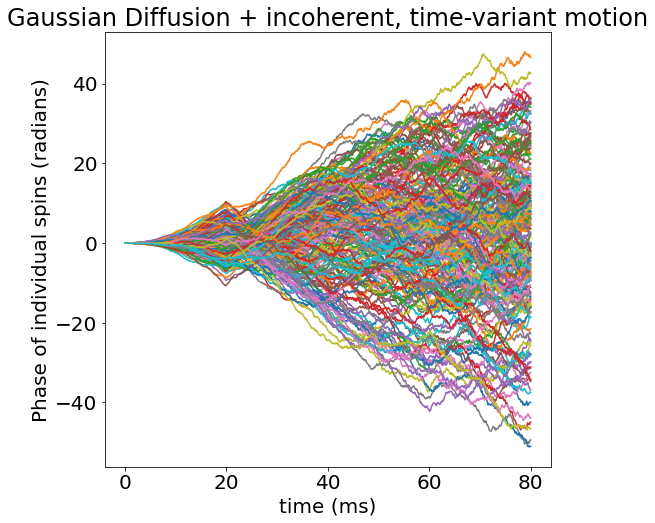

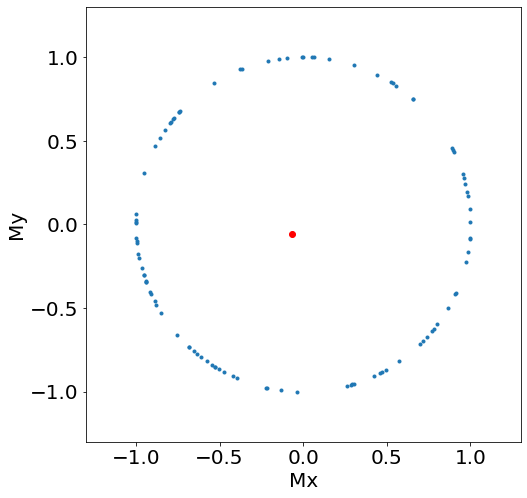

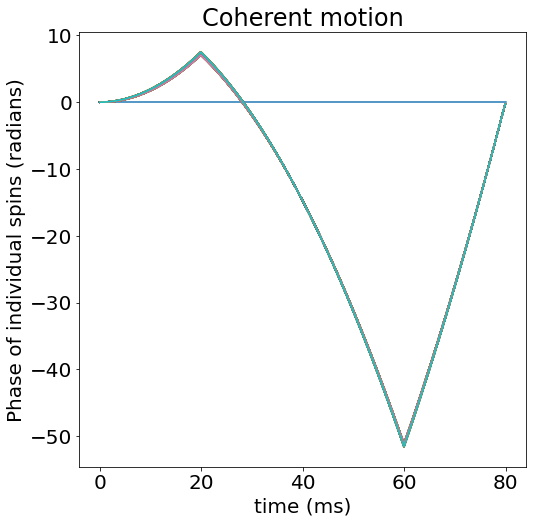

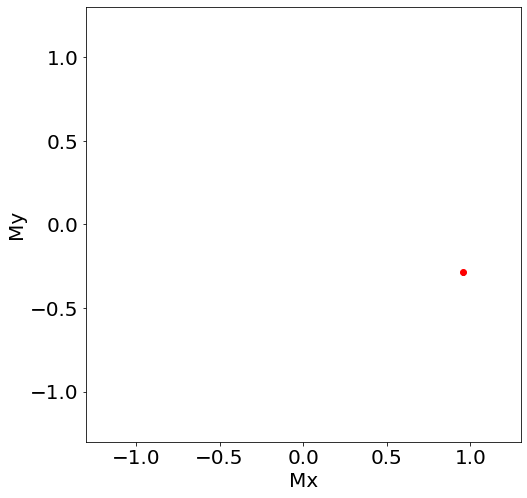

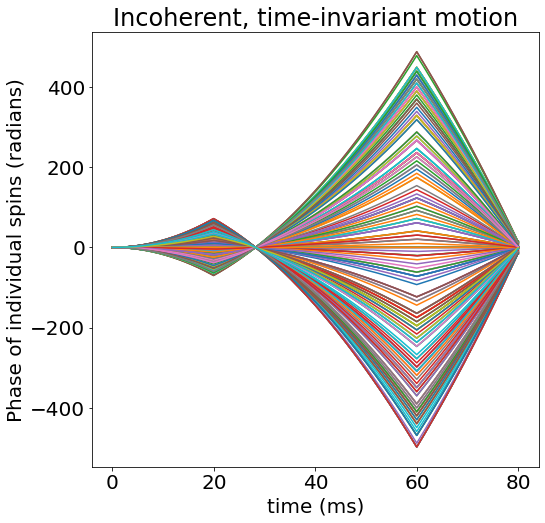

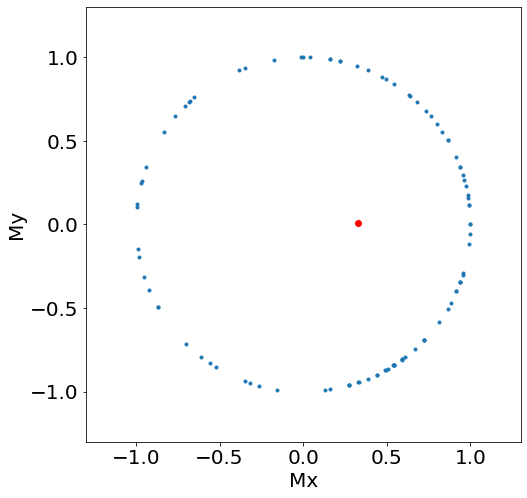

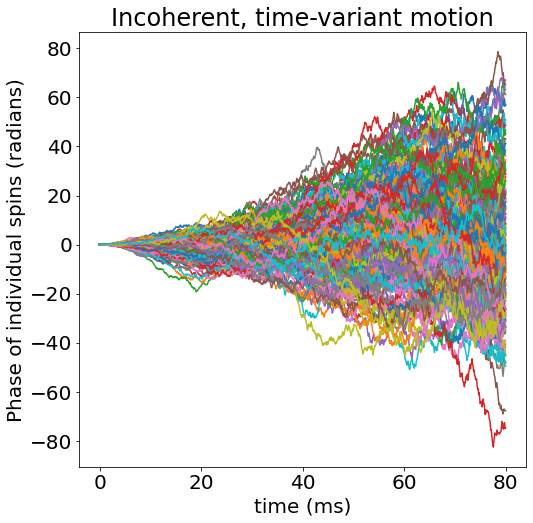

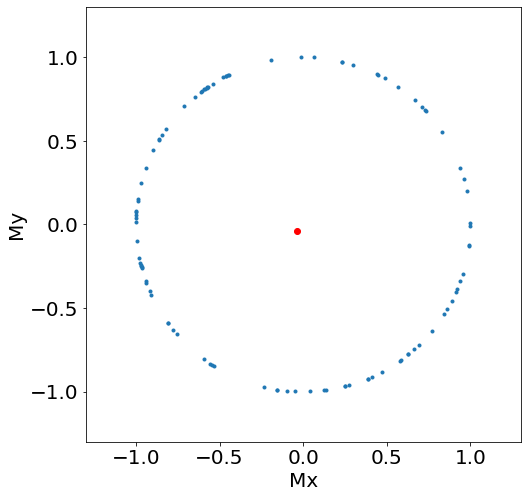

In [443]:
phase = np.zeros([N,NT])
phase02 = np.zeros([N,NT])
phase03 = np.zeros([N,NT])
phase04 = np.zeros([N,NT])
phase05 = np.zeros([N,NT])
phase06 = np.zeros([N,NT])
phase07 = np.zeros([N,NT])
for kt in range(1,NT):
    phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx01[:,kt]*dt*1E-12
    for kn in range(1,N):
            phase02[kn,kt] = phase02[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx02[kn,kt]+vx02[kn,kt]*kt+ax02[kn,kt]*kt*kt/2)*dt*1E-12
            phase03[kn,kt] = phase03[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx03[kn,kt]+vx03[kn,kt]*kt+ax03[kn,kt]*kt*kt/2)*dt*1E-12
            phase04[kn,kt] = phase04[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx04[kn,kt]+vx04[kn,kt]*kt+ax04[kn,kt]*kt*kt/2)*dt*1E-12
            phase05[kn,kt] = phase05[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx05[kn,kt]+vx05[kn,kt]*kt+ax05[kn,kt]*kt*kt/2)*dt*1E-12
            phase06[kn,kt] = phase06[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx06[kn,kt]+vx06[kn,kt]*kt+ax06[kn,kt]*kt*kt/2)*dt*1E-12
            phase07[kn,kt] = phase07[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx07[kn,kt]+vx07[kn,kt]*kt+ax07[kn,kt]*kt*kt/2)*dt*1E-12
    

plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion')
plt.rc('font', **font)

signal_per_spin = np.exp(1j*phase[:,NT-1])
signal_total = np.mean(signal_per_spin)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin[1:100]), np.imag(signal_per_spin[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase02[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + coherent motion')
plt.rc('font', **font)

signal_per_spin2 = np.exp(1j*phase02[:,NT-1])
signal_total2 = np.mean(signal_per_spin2)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin2[1:100]), np.imag(signal_per_spin2[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total2


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase03[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin3 = np.exp(1j*phase03[:,NT-1])
signal_total3 = np.mean(signal_per_spin3)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin3[1:100]), np.imag(signal_per_spin3[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total3


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase04[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin4 = np.exp(1j*phase04[:,NT-1])
signal_total4 = np.mean(signal_per_spin4)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin4[1:100]), np.imag(signal_per_spin4[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total4), np.imag(signal_total4),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total4


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase05[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Coherent motion')
plt.rc('font', **font)

signal_per_spin5 = np.exp(1j*phase05[:,NT-1])
signal_total5 = np.mean(signal_per_spin5)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin5[1:100]), np.imag(signal_per_spin5[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total5), np.imag(signal_total5),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total5


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase06[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin6 = np.exp(1j*phase06[:,NT-1])
signal_total6 = np.mean(signal_per_spin6)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin6[1:100]), np.imag(signal_per_spin6[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total6), np.imag(signal_total6),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total6


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase07[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin7 = np.exp(1j*phase07[:,NT-1])
signal_total7 = np.mean(signal_per_spin7)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin7[1:100]), np.imag(signal_per_spin7[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total7), np.imag(signal_total7),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total7

## M1-nulled gradient waveform

<ipython-input-390-2798cef57761>:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
<ipython-input-390-2798cef57761>:53: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
<ipython-input-390-2798cef57761>:76: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
<ipython-input-390-2798cef57761>:99: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.r

(-0.014175538120761583-0.12664747844022206j)

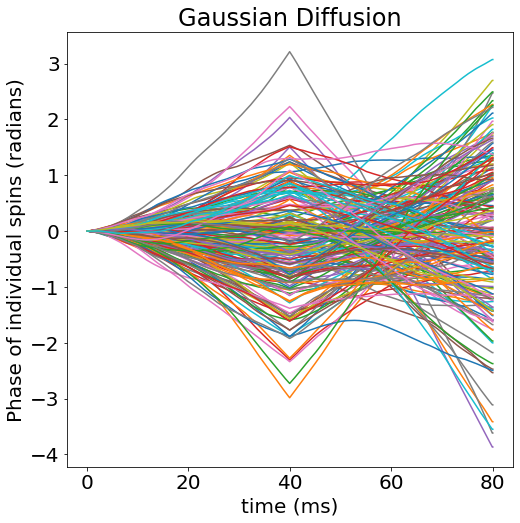

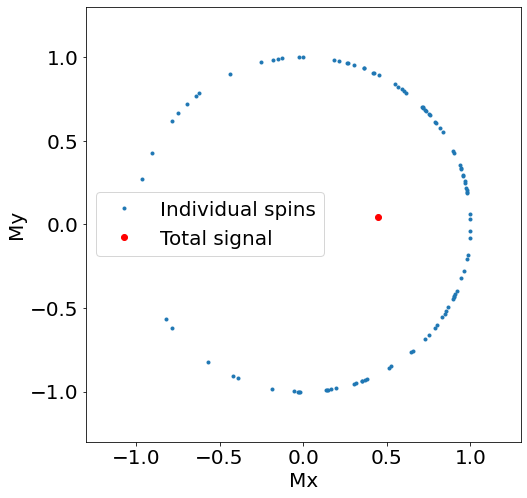

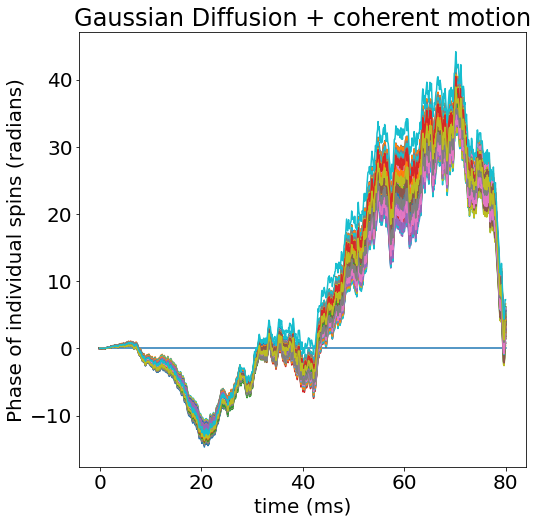

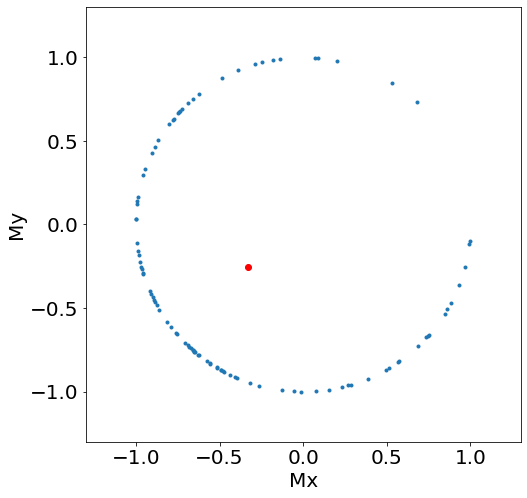

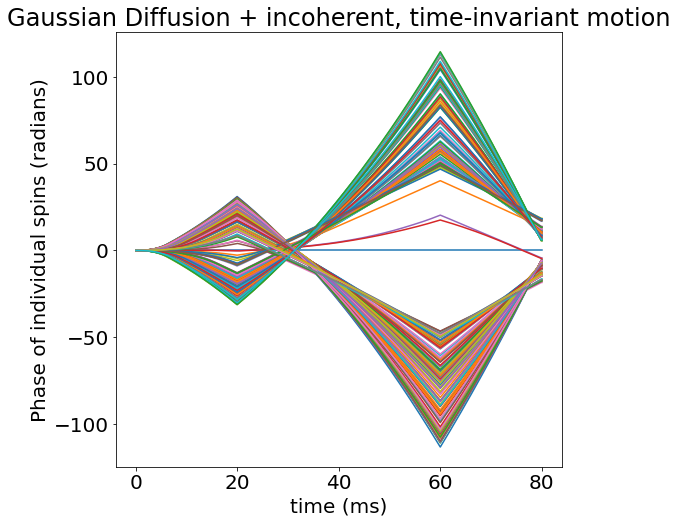

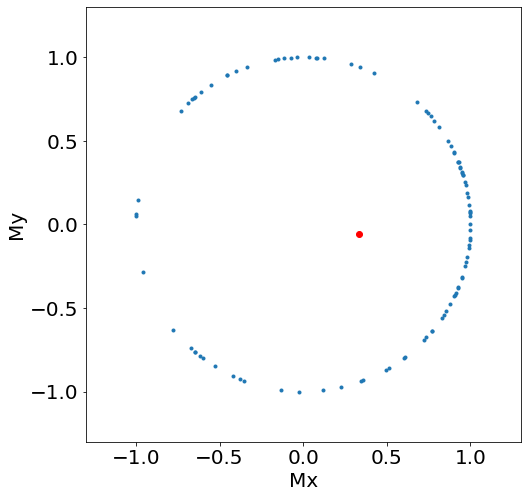

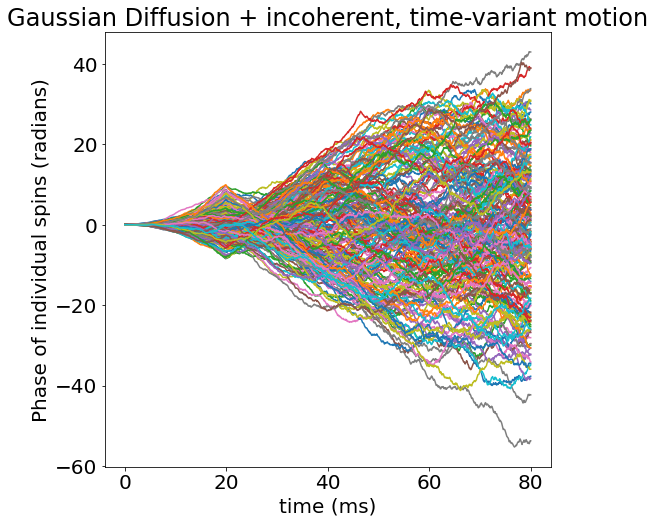

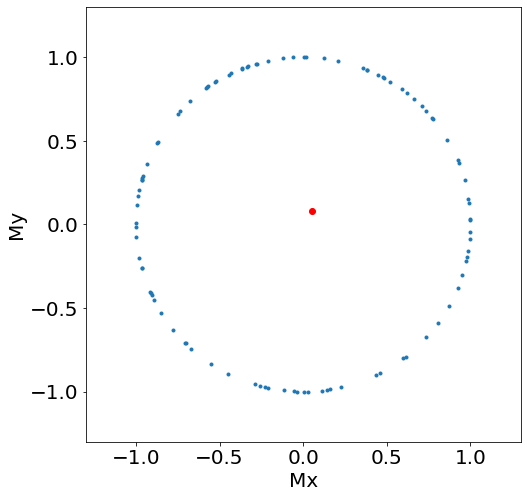

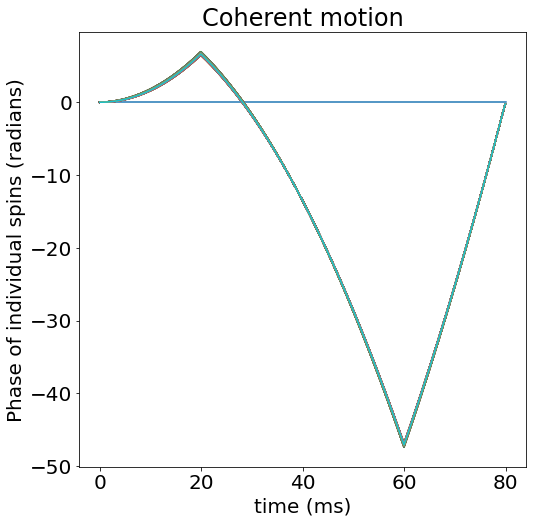

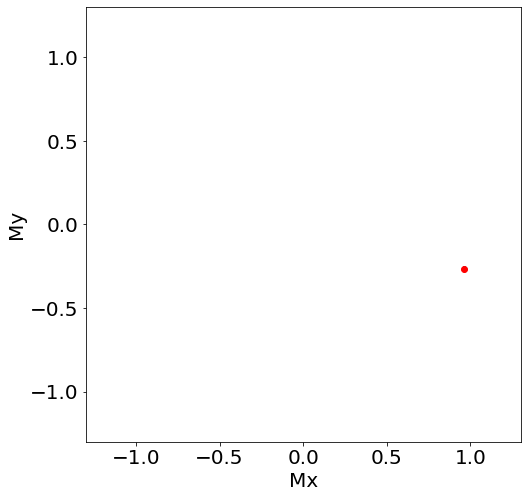

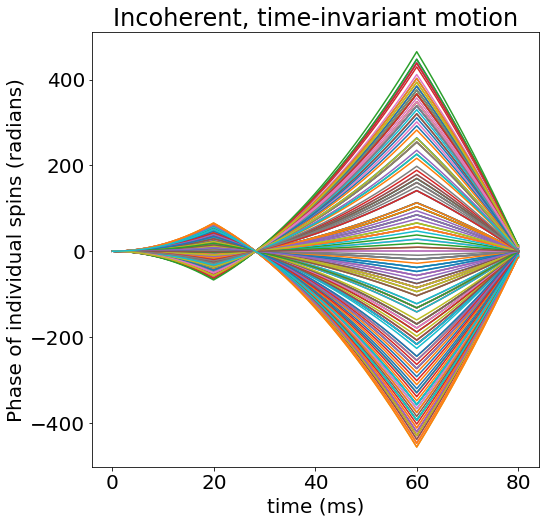

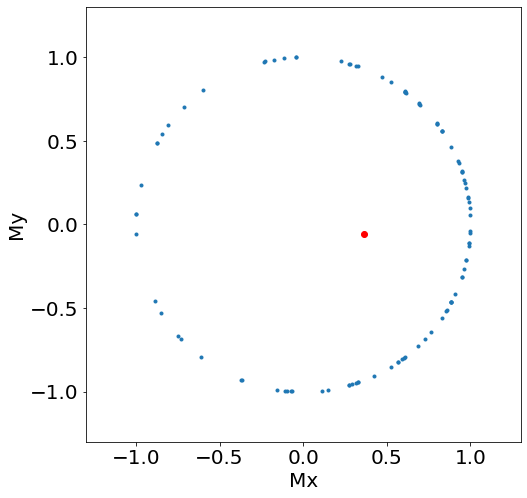

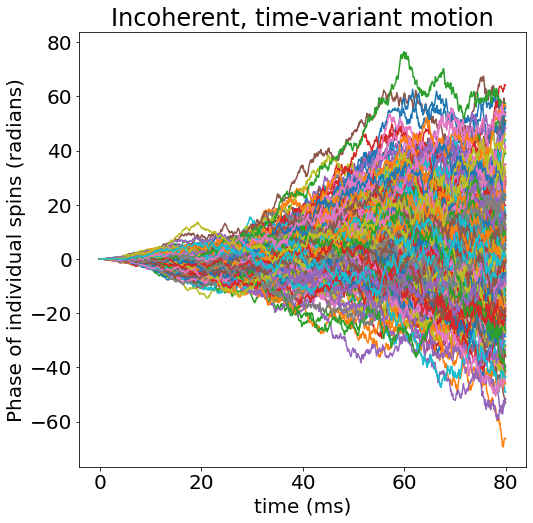

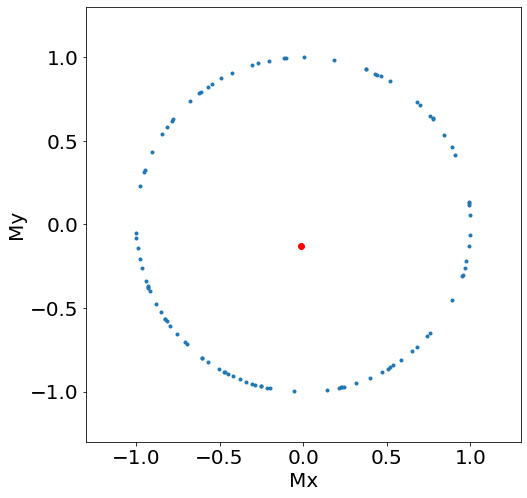

In [390]:
phase = np.zeros([N,NT])
phase02 = np.zeros([N,NT])
phase03 = np.zeros([N,NT])
phase04 = np.zeros([N,NT])
phase05 = np.zeros([N,NT])
phase06 = np.zeros([N,NT])
phase07 = np.zeros([N,NT])
for kt in range(1,NT):
    phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx01[:,kt]*dt*1E-12
    for kn in range(1,N):
            phase02[kn,kt] = phase02[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx02[kn,kt]+vx02[kn,kt]*kt+ax02[kn,kt]*kt*kt/2)*dt*1E-12
            phase03[kn,kt] = phase03[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx03[kn,kt]+vx03[kn,kt]*kt+ax03[kn,kt]*kt*kt/2)*dt*1E-12
            phase04[kn,kt] = phase04[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx04[kn,kt]+vx04[kn,kt]*kt+ax04[kn,kt]*kt*kt/2)*dt*1E-12
            phase05[kn,kt] = phase05[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx05[kn,kt]+vx05[kn,kt]*kt+ax05[kn,kt]*kt*kt/2)*dt*1E-12
            phase06[kn,kt] = phase06[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx06[kn,kt]+vx06[kn,kt]*kt+ax06[kn,kt]*kt*kt/2)*dt*1E-12
            phase07[kn,kt] = phase07[kn,kt-1] + 2*np.pi*gammabar*G1[kt]*(posx07[kn,kt]+vx07[kn,kt]*kt+ax07[kn,kt]*kt*kt/2)*dt*1E-12
        

plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion')
plt.rc('font', **font)

signal_per_spin = np.exp(1j*phase[:,NT-1])
signal_total = np.mean(signal_per_spin)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin[1:100]), np.imag(signal_per_spin[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase02[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + coherent motion')
plt.rc('font', **font)

signal_per_spin2 = np.exp(1j*phase02[:,NT-1])
signal_total2 = np.mean(signal_per_spin2)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin2[1:100]), np.imag(signal_per_spin2[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total2


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase03[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin3 = np.exp(1j*phase03[:,NT-1])
signal_total3 = np.mean(signal_per_spin3)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin3[1:100]), np.imag(signal_per_spin3[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total3


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase04[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin4 = np.exp(1j*phase04[:,NT-1])
signal_total4 = np.mean(signal_per_spin4)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin4[1:100]), np.imag(signal_per_spin4[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total4), np.imag(signal_total4),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total4


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase05[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Coherent motion')
plt.rc('font', **font)

signal_per_spin5 = np.exp(1j*phase05[:,NT-1])
signal_total5 = np.mean(signal_per_spin5)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin5[1:100]), np.imag(signal_per_spin5[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total5), np.imag(signal_total5),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total5


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase06[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin6 = np.exp(1j*phase06[:,NT-1])
signal_total6 = np.mean(signal_per_spin6)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin6[1:100]), np.imag(signal_per_spin6[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total6), np.imag(signal_total6),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total6


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase07[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin7 = np.exp(1j*phase07[:,NT-1])
signal_total7 = np.mean(signal_per_spin7)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin7[1:100]), np.imag(signal_per_spin7[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total7), np.imag(signal_total7),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total7


## M2-nulled gradient waveform

<ipython-input-383-82abaca44f10>:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
<ipython-input-383-82abaca44f10>:53: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
<ipython-input-383-82abaca44f10>:76: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
<ipython-input-383-82abaca44f10>:99: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.r

(0.09508524997987605-0.09901280971334973j)

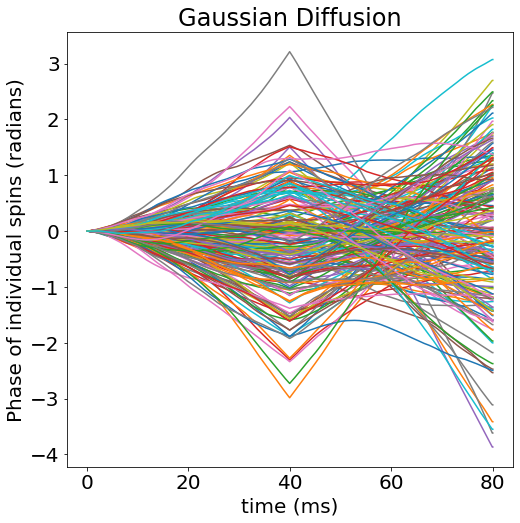

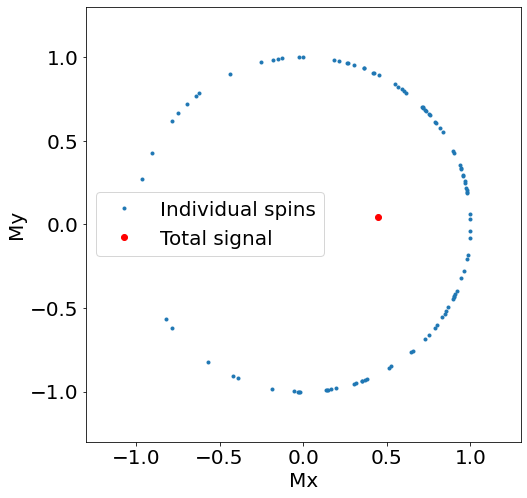

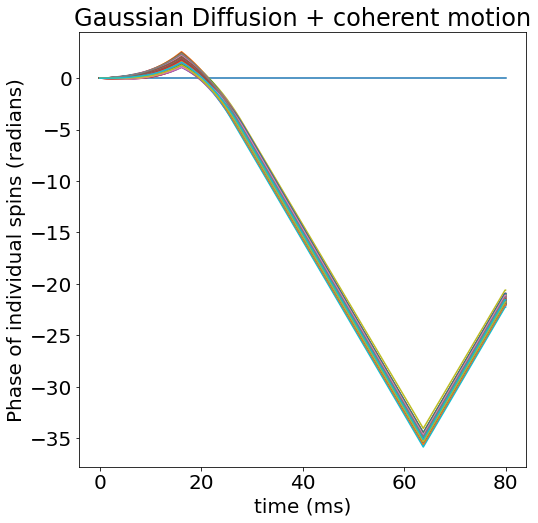

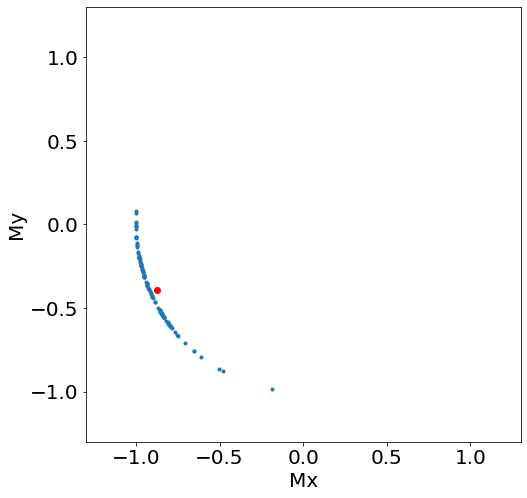

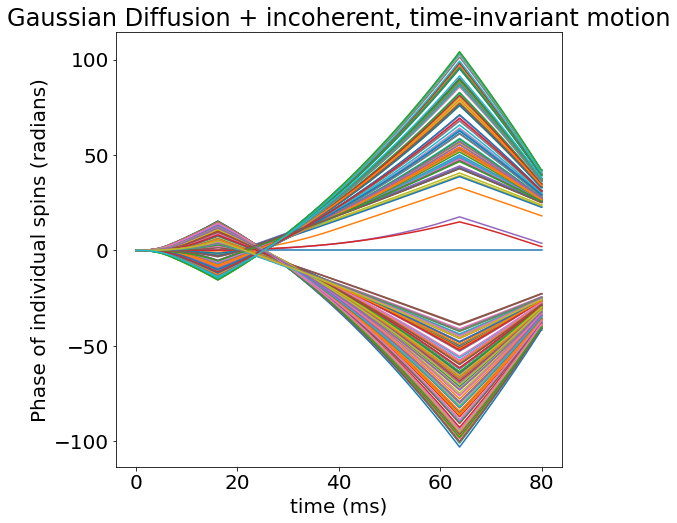

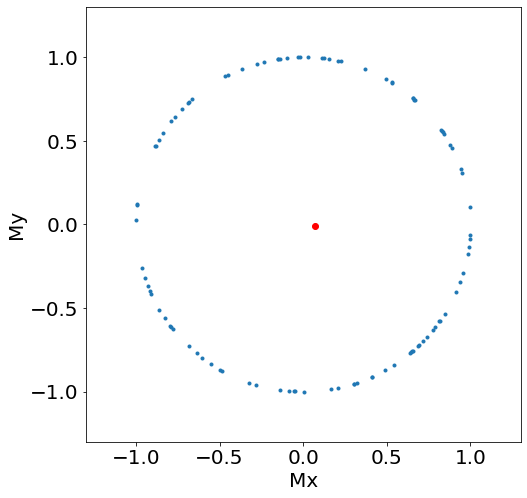

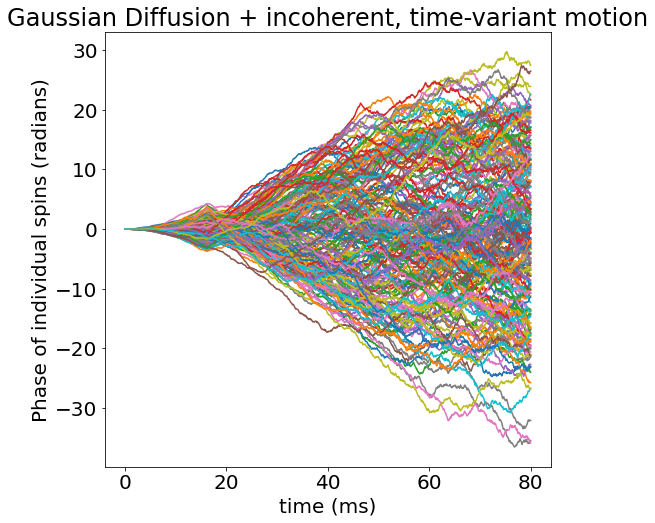

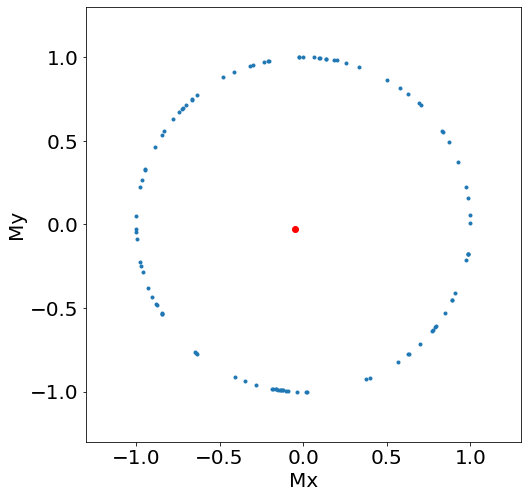

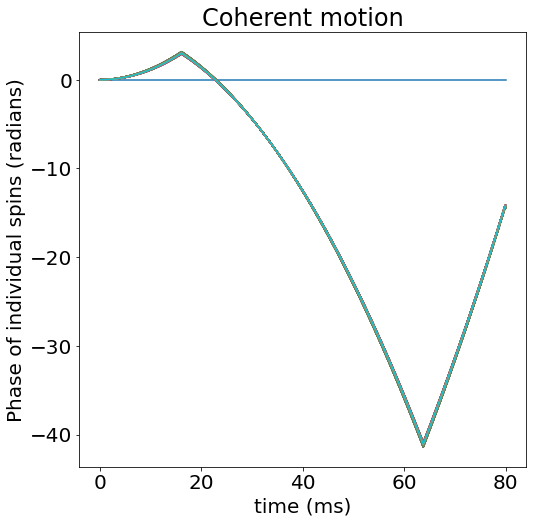

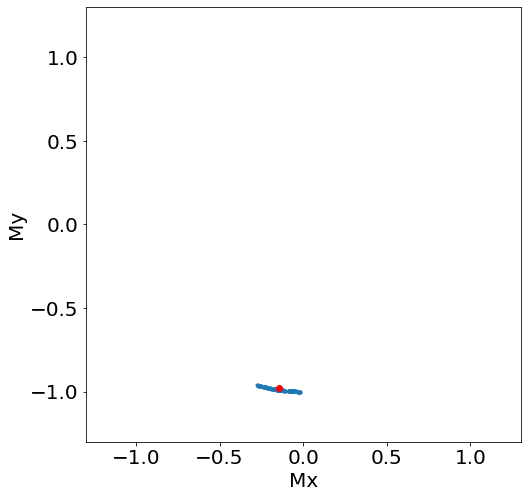

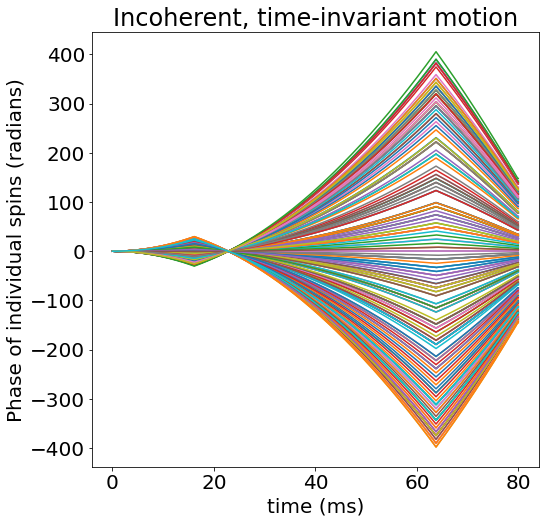

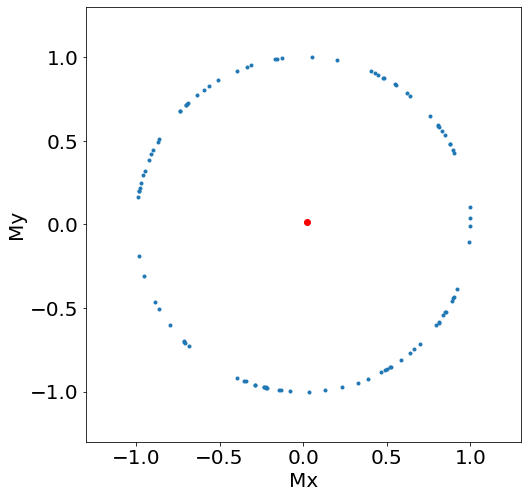

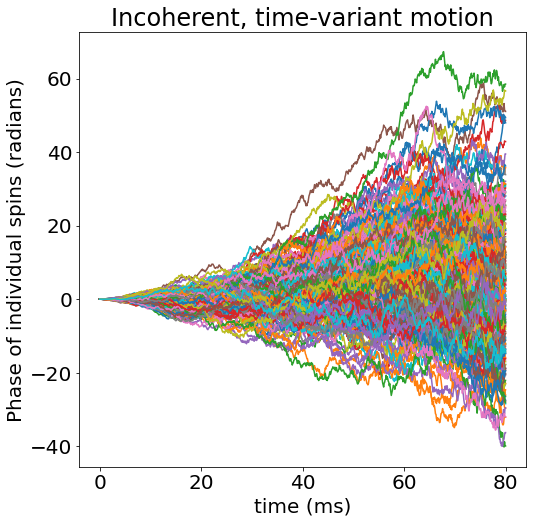

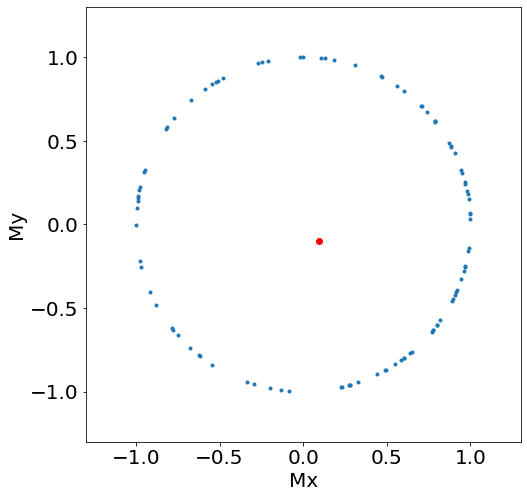

In [383]:
phase = np.zeros([N,NT])
phase02 = np.zeros([N,NT])
phase03 = np.zeros([N,NT])
phase04 = np.zeros([N,NT])
phase05 = np.zeros([N,NT])
phase06 = np.zeros([N,NT])
phase07 = np.zeros([N,NT])
for kt in range(1,NT):
    phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx01[:,kt]*dt*1E-12
    for kn in range(1,N):
            phase02[kn,kt] = phase02[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx02[kn,kt]+vx02[kn,kt]*kt+ax02[kn,kt]*kt*kt/2)*dt*1E-12
            phase03[kn,kt] = phase03[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx03[kn,kt]+vx03[kn,kt]*kt+ax03[kn,kt]*kt*kt/2)*dt*1E-12
            phase04[kn,kt] = phase04[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx04[kn,kt]+vx04[kn,kt]*kt+ax04[kn,kt]*kt*kt/2)*dt*1E-12
            phase05[kn,kt] = phase05[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx05[kn,kt]+vx05[kn,kt]*kt+ax05[kn,kt]*kt*kt/2)*dt*1E-12
            phase06[kn,kt] = phase06[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx06[kn,kt]+vx06[kn,kt]*kt+ax06[kn,kt]*kt*kt/2)*dt*1E-12
            phase07[kn,kt] = phase07[kn,kt-1] + 2*np.pi*gammabar*G2[kt]*(posx07[kn,kt]+vx07[kn,kt]*kt+ax07[kn,kt]*kt*kt/2)*dt*1E-12
        

plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion')
plt.rc('font', **font)

signal_per_spin = np.exp(1j*phase[:,NT-1])
signal_total = np.mean(signal_per_spin)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin[1:100]), np.imag(signal_per_spin[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase02[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + coherent motion')
plt.rc('font', **font)

signal_per_spin2 = np.exp(1j*phase02[:,NT-1])
signal_total2 = np.mean(signal_per_spin2)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin2[1:100]), np.imag(signal_per_spin2[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total2


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase03[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin3 = np.exp(1j*phase03[:,NT-1])
signal_total3 = np.mean(signal_per_spin3)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin3[1:100]), np.imag(signal_per_spin3[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total3


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase04[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Gaussian Diffusion + incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin4 = np.exp(1j*phase04[:,NT-1])
signal_total4 = np.mean(signal_per_spin4)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin4[1:100]), np.imag(signal_per_spin4[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total4), np.imag(signal_total4),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total4


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase05[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Coherent motion')
plt.rc('font', **font)

signal_per_spin5 = np.exp(1j*phase05[:,NT-1])
signal_total5 = np.mean(signal_per_spin5)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin5[1:100]), np.imag(signal_per_spin5[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total5), np.imag(signal_total5),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total5


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase06[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-invariant motion')
plt.rc('font', **font)

signal_per_spin6 = np.exp(1j*phase06[:,NT-1])
signal_total6 = np.mean(signal_per_spin6)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin6[1:100]), np.imag(signal_per_spin6[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total6), np.imag(signal_total6),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total6


plt.figure(figsize=(8,8)) 
plt.plot(t,np.transpose(phase07[:,:]) );
plt.xlabel('time (ms)')
plt.ylabel('Phase of individual spins (radians)')
plt.title('Incoherent, time-variant motion')
plt.rc('font', **font)

signal_per_spin7 = np.exp(1j*phase07[:,NT-1])
signal_total7 = np.mean(signal_per_spin7)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin7[1:100]), np.imag(signal_per_spin7[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total7), np.imag(signal_total7),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total7

### Calculating the total signal from all our spins

Simply the sum of the signals from all spins, normalized by the number of spins for simplicity (ie: the mean of the signals from all spins) 

<ipython-input-375-65b7b467f00c>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
<ipython-input-375-65b7b467f00c>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
<ipython-input-375-65b7b467f00c>:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
<ipython-input-375-65b7b467f00c>:51: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(np.re

(0.09508524997987605-0.09901280971334973j)

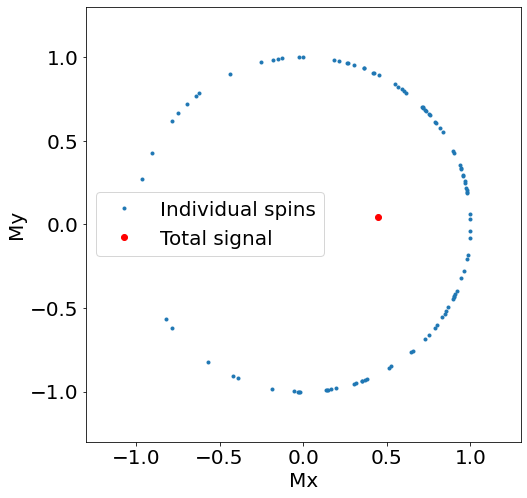

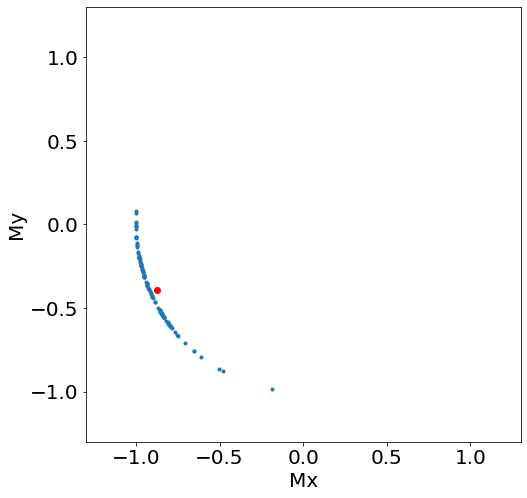

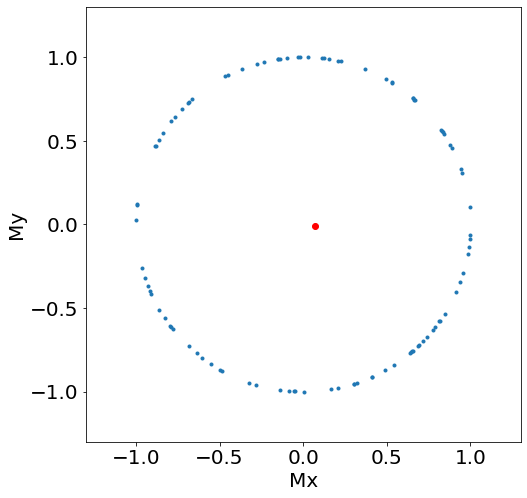

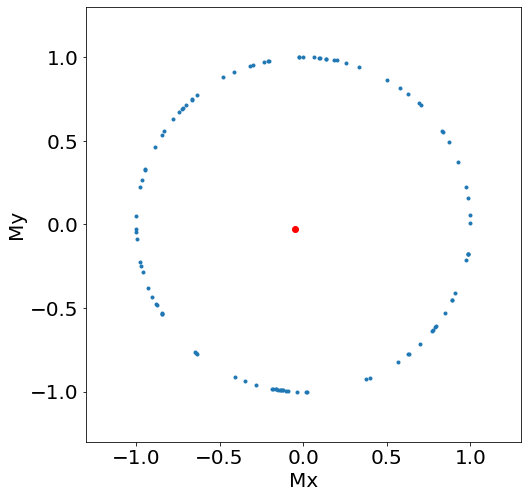

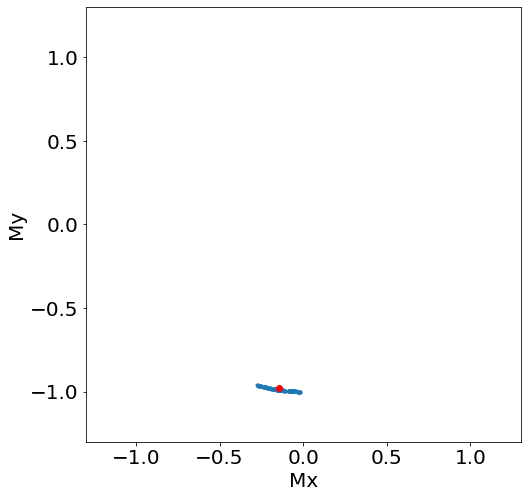

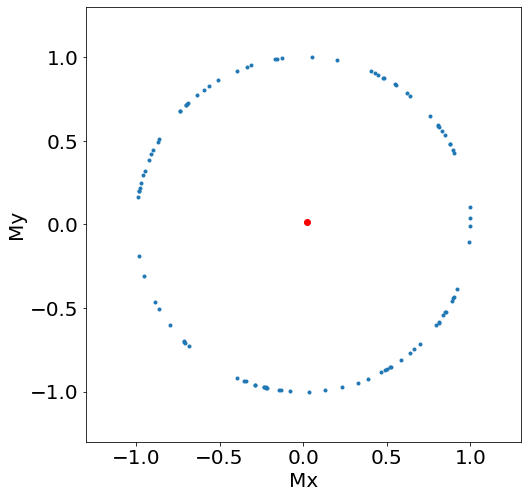

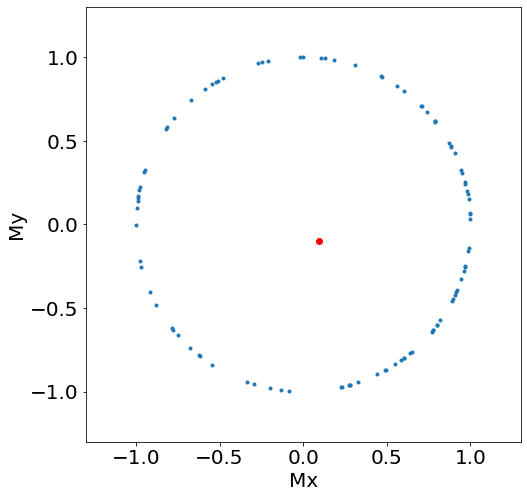

In [375]:
signal_per_spin = np.exp(1j*phase[:,NT-1])
signal_total = np.mean(signal_per_spin)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin[1:100]), np.imag(signal_per_spin[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total), np.imag(signal_total),'.r', MarkerSize=12, label='Total signal')
plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total


signal_per_spin2 = np.exp(1j*phase02[:,NT-1])
signal_total2 = np.mean(signal_per_spin2)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin2[1:100]), np.imag(signal_per_spin2[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total2), np.imag(signal_total2),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total2

signal_per_spin3 = np.exp(1j*phase03[:,NT-1])
signal_total3 = np.mean(signal_per_spin3)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin3[1:100]), np.imag(signal_per_spin3[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total3), np.imag(signal_total3),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total3

signal_per_spin4 = np.exp(1j*phase04[:,NT-1])
signal_total4 = np.mean(signal_per_spin4)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin4[1:100]), np.imag(signal_per_spin4[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total4), np.imag(signal_total4),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total4

signal_per_spin5 = np.exp(1j*phase05[:,NT-1])
signal_total5 = np.mean(signal_per_spin5)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin5[1:100]), np.imag(signal_per_spin5[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total5), np.imag(signal_total5),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total5

signal_per_spin6 = np.exp(1j*phase06[:,NT-1])
signal_total6 = np.mean(signal_per_spin6)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin6[1:100]), np.imag(signal_per_spin6[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total6), np.imag(signal_total6),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total6

signal_per_spin7 = np.exp(1j*phase07[:,NT-1])
signal_total7 = np.mean(signal_per_spin7)
plt.figure(figsize=(8,8))
plt.plot(np.real(signal_per_spin7[1:100]), np.imag(signal_per_spin7[1:100]),'.', label='Individual spins')
plt.plot(np.real(signal_total7), np.imag(signal_total7),'.r', MarkerSize=12, label='Total signal')
#plt.legend()
axes = plt.gca()
axes.set_aspect('equal')
axes.set_xlim(-1.3,1.3)
axes.set_ylim(-1.3,1.3)
plt.xlabel('Mx');
plt.ylabel('My');
plt.rc('font', **font)
signal_total7

### Calculating the signal across multiple b values

Finally, let's repeat our simulation by scaling our diffusion gradient multiple times with different scaling factors, leading to different b values, and see what signal we get. 

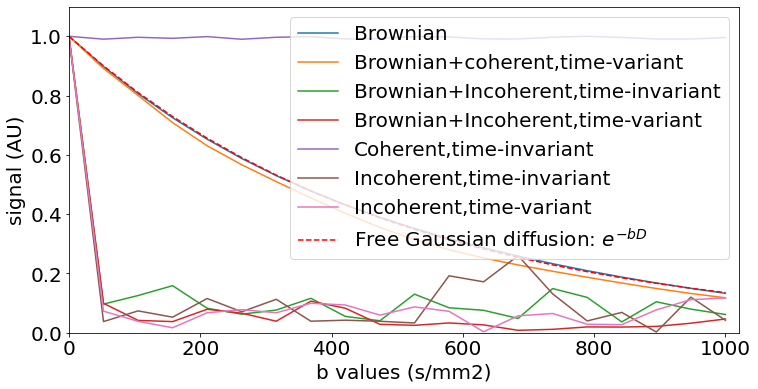

In [394]:
# Now let's get signals across many b values by scaling our gradient
num_b = 20 
b = np.linspace(0,1000,num_b)
G_vals = np.sqrt(b/binit)

b_calc = np.zeros(num_b)

signal = np.zeros(num_b) + 1j*np.zeros(num_b)
signal02 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal03 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal04 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal05 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal06 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal07 = np.zeros(num_b) + 1j*np.zeros(num_b)

for kb in range(num_b):
    G_val = G_vals[kb]
    G = Gnorm*G_val #change gradient here
    b_calc[kb] = (gamma**2) * np.sum((np.cumsum(G*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6
    #phase = np.zeros([N,NT])
    for kt in range(1,NT):
        phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx01[:,kt]*dt*1E-12
        for kn in range(1,N):
            phase02[kn,kt] = phase02[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx02[kn,kt]+vx02[kn,kt]*kt+ax02[kn,kt]*kt*kt/2)*dt*1E-12
            phase03[kn,kt] = phase03[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx03[kn,kt]+vx03[kn,kt]*kt+ax03[kn,kt]*kt*kt/2)*dt*1E-12
            phase04[kn,kt] = phase04[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx04[kn,kt]+vx04[kn,kt]*kt+ax04[kn,kt]*kt*kt/2)*dt*1E-12
            phase05[kn,kt] = phase05[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx05[kn,kt]+vx05[kn,kt]*kt+ax05[kn,kt]*kt*kt/2)*dt*1E-12
            phase06[kn,kt] = phase06[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx06[kn,kt]+vx06[kn,kt]*kt+ax06[kn,kt]*kt*kt/2)*dt*1E-12
            phase07[kn,kt] = phase07[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx07[kn,kt]+vx07[kn,kt]*kt+ax07[kn,kt]*kt*kt/2)*dt*1E-12

    signal[kb] = np.mean(np.exp(1j*phase[:,NT-1]))
    signal02[kb] = np.mean(np.exp(1j*phase02[:,NT-1]))
    signal03[kb] = np.mean(np.exp(1j*phase03[:,NT-1]))
    signal04[kb] = np.mean(np.exp(1j*phase04[:,NT-1]))
    signal05[kb] = np.mean(np.exp(1j*phase05[:,NT-1]))
    signal06[kb] = np.mean(np.exp(1j*phase06[:,NT-1]))
    signal07[kb] = np.mean(np.exp(1j*phase07[:,NT-1]))
    
plt.figure(figsize=(20,12))
plt.plot(b_calc,np.abs(signal),label='Brownian')
plt.xlabel('b values (s/mm^2)')
plt.ylabel('signal (AU)')
plt.title('Monopolar')
axes = plt.gca()
axes.set_xlim(0,1.02*b[-1])
axes.set_ylim(0,1.1)
    
plt.plot(b_calc,np.abs(signal02),label='Brownian+coherent,time-variant')
plt.plot(b_calc,np.abs(signal03),label='Brownian+Incoherent,time-invariant')
plt.plot(b_calc,np.abs(signal04),label='Brownian+Incoherent,time-variant')
plt.plot(b_calc,np.abs(signal05),label='Coherent,time-invariant')
plt.plot(b_calc,np.abs(signal06),label='Incoherent,time-invariant')
plt.plot(b_calc,np.abs(signal07),label='Incoherent,time-variant')   
# Plot standard monoexponential decay, for comparison    
plt.plot(b,np.exp(-b*D),'r--',label='Free Gaussian diffusion: $e^{-bD}$')    
plt.legend();
plt.rc('font', **font)

# Plot eye-ball apparent diffusion coefficient (ADC) fitting   
# ADC = 0.4E-3
# plt.plot(b,np.exp(-b*ADC),'m',label='Fitted ADC signal: : $e^{-b ADC}$')    
# plt.legend();
# plt.rc('font', **font)

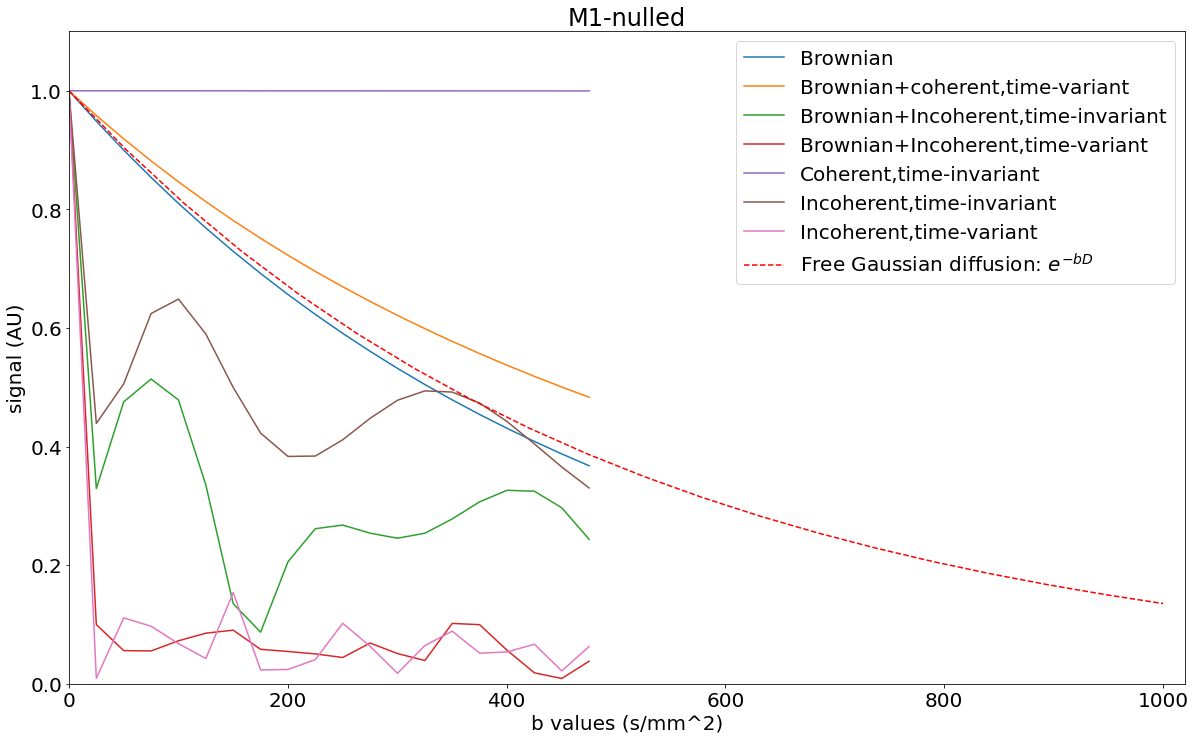

In [430]:
# Now let's get signals across many b values by scaling our gradient
num_b = 20 
b = np.linspace(0,1000,num_b)
G_vals = np.sqrt(b/binit)

b_calc = np.zeros(num_b)

signal = np.zeros(num_b) + 1j*np.zeros(num_b)
signal02 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal03 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal04 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal05 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal06 = np.zeros(num_b) + 1j*np.zeros(num_b)
signal07 = np.zeros(num_b) + 1j*np.zeros(num_b)

for kb in range(num_b):
    G_val = G_vals[kb]
    G = Gnorm1*G_val #change gradient here
    b_calc[kb] = (gamma**2) * np.sum((np.cumsum(G*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6
    #phase = np.zeros([N,NT])
    for kt in range(1,NT):
        phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx01[:,kt]*dt*1E-12
        for kn in range(1,N):
            phase02[kn,kt] = phase02[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx02[kn,kt]+vx02[kn,kt]*kt+ax02[kn,kt]*kt*kt/2)*dt*1E-12
            phase03[kn,kt] = phase03[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx03[kn,kt]+vx03[kn,kt]*kt+ax03[kn,kt]*kt*kt/2)*dt*1E-12
            phase04[kn,kt] = phase04[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx04[kn,kt]+vx04[kn,kt]*kt+ax04[kn,kt]*kt*kt/2)*dt*1E-12
            phase05[kn,kt] = phase05[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx05[kn,kt]+vx05[kn,kt]*kt+ax05[kn,kt]*kt*kt/2)*dt*1E-12
            phase06[kn,kt] = phase06[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx06[kn,kt]+vx06[kn,kt]*kt+ax06[kn,kt]*kt*kt/2)*dt*1E-12
            phase07[kn,kt] = phase07[kn,kt-1] + 2*np.pi*gammabar*G[kt]*(posx07[kn,kt]+vx07[kn,kt]*kt+ax07[kn,kt]*kt*kt/2)*dt*1E-12

    signal[kb] = np.mean(np.exp(1j*phase[:,NT-1]))
    signal02[kb] = np.mean(np.exp(1j*phase02[:,NT-1]))
    signal03[kb] = np.mean(np.exp(1j*phase03[:,NT-1]))
    signal04[kb] = np.mean(np.exp(1j*phase04[:,NT-1]))
    signal05[kb] = np.mean(np.exp(1j*phase05[:,NT-1]))
    signal06[kb] = np.mean(np.exp(1j*phase06[:,NT-1]))
    signal07[kb] = np.mean(np.exp(1j*phase07[:,NT-1]))
    
plt.figure(figsize=(20,12))
plt.plot(b_calc,np.abs(signal),label='Brownian')
plt.xlabel('b values (s/mm^2)')
plt.ylabel('signal (AU)')
plt.title('M1-nulled')
axes = plt.gca()
axes.set_xlim(0,1.02*b[-1])
axes.set_ylim(0,1.1)
    
plt.plot(b_calc,np.abs(signal02),label='Brownian+coherent,time-variant')
plt.plot(b_calc,np.abs(signal03),label='Brownian+Incoherent,time-invariant')
plt.plot(b_calc,np.abs(signal04),label='Brownian+Incoherent,time-variant')
plt.plot(b_calc,np.abs(signal05),label='Coherent,time-invariant')
plt.plot(b_calc,np.abs(signal06),label='Incoherent,time-invariant')
plt.plot(b_calc,np.abs(signal07),label='Incoherent,time-variant')   
# Plot standard monoexponential decay, for comparison    
plt.plot(b,np.exp(-b*D),'r--',label='Free Gaussian diffusion: $e^{-bD}$')    
plt.legend();
plt.rc('font', **font)

# Plot eye-ball apparent diffusion coefficient (ADC) fitting   
# ADC = 0.4E-3
# plt.plot(b,np.exp(-b*ADC),'m',label='Fitted ADC signal: : $e^{-b ADC}$')    
# plt.legend();
# plt.rc('font', **font)

### Calculating the signal across multiple diffusion directions

Finally, let's repeat our simulation by rotating our diffusion gradient multiple times with different diffusion gradient directions, and see what signal we get. 

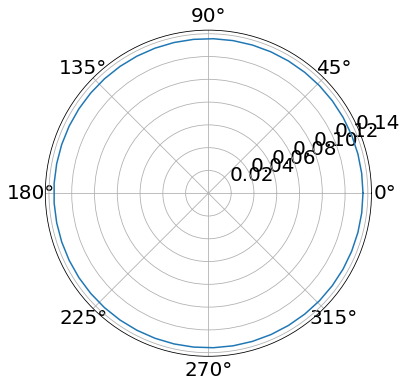

In [178]:
# Now let's get signals across many b values by scaling our gradient
b = 800.0
G_val = np.sqrt(b/binit)
G = Gnorm*G_val
b_calc = (gamma**2) * np.sum((np.cumsum(G*1E-3*dt*1E-3))**2)*dt*1E-3*1E-6
num_angles = 50
G_angles = np.linspace(0,2*np.pi,num_angles)


signal = np.zeros(num_angles) + 1j*np.zeros(num_angles)
for ka in range(num_angles):
    G_angle = G_angles[ka]
    phase = np.zeros([N,NT])
    for kt in range(1,NT):
        #phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*G[kt]*posx[:,kt]*np.cos(G_angle)*dt*1E-12 + 2*np.pi*gammabar*G[kt]*posy[:,kt]*np.sin(G_angle)*dt*1E-12
        #phase[:,kt] = phase[:,kt-1] + 2*np.pi*gammabar*(G[kt]*posx[:,kt]+v*G[kt]*kt+a*G[kt]*kt*kt/2)*np.cos(G_angle)*dt*1E-12 + 2*np.pi*gammabar*G[kt]*posy[:,kt]*np.sin(G_angle)*dt*1E-12
        for kn in range(1,N):
            phase[kn,kt] = phase[kn,kt-1] + 2*np.pi*gammabar*(G[kt]*posx[kn,kt]+vx[kn,kt]*G[kt]*kt+ax[kn,kt]*G[kt]*kt*kt/2)*dt*1E-12

    signal[ka] = np.mean(np.exp(1j*phase[:,NT-1]))
    
plt.figure(figsize=(12,6))
#plt.plot(np.abs(signal)*np.cos(G_angles),np.abs(signal)*np.sin(G_angles),label='Simulated signal')
#axes = plt.gca()
#axes.set_xlim(-1.05,1.05)
#axes.set_ylim(-1.05,1.05)
plt.polar(G_angles, np.abs(signal))    

